<h3> Create a spark session and load the Incident Management Data set

In [0]:
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.appName('Desicion-Tree').getOrCreate()

In [0]:
# File Upload for all the models

file_location = "/FileStore/tables/airbnb.csv"
file_type = "csv"
 
# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","
 
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

In [0]:
data = df

In [0]:
data=data.dropna()

In [0]:
display(data)

host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,Number_of_amenities,guests_included,price_per_extra_person,minimum_nights,number_of_reviews,number_days_btw_first_last_review,review_scores_rating,cancellation_policy,price,price_gte_150,price_category
0,1,Roslindale,42.28624082,-71.13437396,Apartment,Private room,2,1.0,1,1,Real Bed,20,0,0,2,36,804,94,moderate,65,0,lte_$75
1,1,Roslindale,42.29243789,-71.13576525,Apartment,Private room,2,1.0,1,1,Real Bed,17,1,20,3,41,2574,98,moderate,65,0,lte_$75
0,0,Roslindale,42.28110619,-71.12102117,House,Private room,4,1.0,1,2,Real Bed,22,2,25,1,1,0,100,moderate,75,0,lte_$75
1,1,Roslindale,42.28451221,-71.13625805,House,Private room,2,1.5,1,2,Real Bed,13,1,0,2,29,380,99,flexible,79,0,btw_$75-$150
1,1,Roslindale,42.2916898,-71.13189277,Condominium,Private room,2,1.0,1,1,Real Bed,12,1,0,2,8,130,100,flexible,75,0,lte_$75
0,1,Roslindale,42.28138963,-71.13119042,Apartment,Entire home/apt,3,1.0,1,2,Real Bed,12,1,25,1,57,421,90,strict,100,0,btw_$75-$150
1,1,Roslindale,42.2819461,-71.14102161,House,Private room,2,2.0,1,1,Real Bed,22,1,15,1,67,840,96,moderate,75,0,lte_$75
1,1,Roslindale,42.28587764,-71.12490956,Condominium,Private room,2,1.0,1,2,Real Bed,9,2,0,2,65,355,96,moderate,58,0,lte_$75
1,1,Roslindale,42.28882028,-71.1395101,Apartment,Entire home/apt,5,1.0,2,2,Real Bed,21,4,25,4,33,876,94,strict,229,1,gte_226
0,0,Roslindale,42.2864482,-71.13932539,House,Private room,2,1.0,1,1,Real Bed,15,1,10,1,1,0,80,flexible,60,0,lte_$75


In [0]:
data.printSchema()

root
 |-- host_is_superhost: integer (nullable = true)
 |-- host_identity_verified: integer (nullable = true)
 |-- neighbourhood_cleansed: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- property_type: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- accommodates: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- beds: integer (nullable = true)
 |-- bed_type: string (nullable = true)
 |-- Number_of_amenities: integer (nullable = true)
 |-- guests_included: integer (nullable = true)
 |-- price_per_extra_person: integer (nullable = true)
 |-- minimum_nights: integer (nullable = true)
 |-- number_of_reviews: integer (nullable = true)
 |-- number_days_btw_first_last_review: integer (nullable = true)
 |-- review_scores_rating: integer (nullable = true)
 |-- cancellation_policy: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- 

<h3> Data transformation

In [0]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import StringIndexer
from pyspark.mllib.linalg import SparseVector
from pyspark.mllib.classification import SVMWithSGD, SVMModel
from pyspark.mllib.regression import LabeledPoint



In [0]:
# Use StringIndexer to convert the categorical columns to hold numerical data
neighbourhood_cleansed_indexer = StringIndexer(inputCol='neighbourhood_cleansed',outputCol='neighbourhood_cleansed_index',handleInvalid='keep')
property_type_indexer = StringIndexer(inputCol='property_type',outputCol='property_type_index',handleInvalid='keep')
room_type_indexer = StringIndexer(inputCol='room_type',outputCol='room_type_index',handleInvalid='keep')
bed_type_indexer = StringIndexer(inputCol='bed_type',outputCol='bed_type_index',handleInvalid='keep')
cancellation_policy_group_indexer = StringIndexer(inputCol='cancellation_policy',outputCol='cancellation_policy_index',handleInvalid='keep')
price_category_indexer = StringIndexer(inputCol='price_category',outputCol='price_category_index',handleInvalid='keep')

In [0]:
# Vector assembler is used to create a vector of input features, the output feature column is 'unscaled_features'
assembler = VectorAssembler(inputCols=['neighbourhood_cleansed_index',
                                       'property_type_index','room_type_index','bed_type_index','cancellation_policy_index',
                                       'price_category_index','host_is_superhost','host_identity_verified','latitude','longitude','accommodates','bathrooms',
                                       'bedrooms','beds','Number_of_amenities','guests_included','price_per_extra_person',
                                       'minimum_nights','number_of_reviews','number_days_btw_first_last_review',
                                       'review_scores_rating','price'],
                            outputCol="unscaled_features")

In [0]:
# Standard scaler is used to scale the data for the linear SVC to perform well on the training data
scaler = StandardScaler(inputCol="unscaled_features", outputCol="features")

In [0]:
# Create SVM model
svm = LinearSVC(labelCol='price_gte_150',maxIter=10, regParam=0.1)

In [0]:
pipe = Pipeline(stages=[neighbourhood_cleansed_indexer,property_type_indexer,room_type_indexer,bed_type_indexer,cancellation_policy_group_indexer,price_category_indexer,assembler, scaler])
learned_data = pipe.fit(data)
final_data = learned_data.transform(data)
display(final_data)

host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,Number_of_amenities,guests_included,price_per_extra_person,minimum_nights,number_of_reviews,number_days_btw_first_last_review,review_scores_rating,cancellation_policy,price,price_gte_150,price_category,neighbourhood_cleansed_index,property_type_index,room_type_index,bed_type_index,cancellation_policy_index,price_category_index,unscaled_features,features
0,1,Roslindale,42.28624082,-71.13437396,Apartment,Private room,2,1.0,1,1,Real Bed,20,0,0,2,36,804,94,moderate,65,0,lte_$75,16.0,0.0,1.0,0.0,1.0,3.0,"Map(vectorType -> dense, length -> 22, values -> List(16.0, 0.0, 1.0, 0.0, 1.0, 3.0, 0.0, 1.0, 42.28624082, -71.13437396, 2.0, 1.0, 1.0, 1.0, 20.0, 0.0, 0.0, 2.0, 36.0, 804.0, 94.0, 65.0))","Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 0.0, 1.8767549369162262, 0.0, 1.1571015702051193, 2.61266231030981, 0.0, 2.3683933156977366, 1687.8652878424073, -2237.8090158987006, 1.1147523497055931, 2.047284816618834, 1.3358157877964532, 0.9641202261279427, 4.166025232696071, 0.0, 0.0, 0.2236523710768346, 0.9339772207476331, 1.8944768489527857, 9.876310153709511, 0.6463213363554587))"
1,1,Roslindale,42.29243789,-71.13576525,Apartment,Private room,2,1.0,1,1,Real Bed,17,1,20,3,41,2574,98,moderate,65,0,lte_$75,16.0,0.0,1.0,0.0,1.0,3.0,"Map(vectorType -> dense, length -> 22, values -> List(16.0, 0.0, 1.0, 0.0, 1.0, 3.0, 1.0, 1.0, 42.29243789, -71.13576525, 2.0, 1.0, 1.0, 1.0, 17.0, 1.0, 20.0, 3.0, 41.0, 2574.0, 98.0, 65.0))","Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 0.0, 1.8767549369162262, 0.0, 1.1571015702051193, 2.61266231030981, 2.861147533989926, 2.3683933156977366, 1688.112645354839, -2237.852784348923, 1.1147523497055931, 2.047284816618834, 1.3358157877964532, 0.9641202261279427, 3.54112144779166, 0.9066684905634247, 1.0118325184856605, 0.33547855661525194, 1.0636962791848044, 6.06515349403541, 10.29657867088864, 0.6463213363554587))"
0,0,Roslindale,42.28110619,-71.12102117,House,Private room,4,1.0,1,2,Real Bed,22,2,25,1,1,0,100,moderate,75,0,lte_$75,16.0,1.0,1.0,0.0,1.0,3.0,"Map(vectorType -> dense, length -> 22, values -> List(16.0, 1.0, 1.0, 0.0, 1.0, 3.0, 0.0, 0.0, 42.28110619, -71.12102117, 4.0, 1.0, 1.0, 2.0, 22.0, 2.0, 25.0, 1.0, 1.0, 0.0, 100.0, 75.0))","Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 0.8951089775754191, 1.8767549369162262, 0.0, 1.1571015702051193, 2.61266231030981, 0.0, 0.0, 1687.660337873461, -2237.3889518398505, 2.2295046994111862, 2.047284816618834, 1.3358157877964532, 1.9282404522558854, 4.582627755965678, 1.8133369811268494, 1.2647906481070756, 0.1118261855384173, 0.025943811687434253, 0.0, 10.506712929478205, 0.7457553881024523))"
1,1,Roslindale,42.28451221,-71.13625805,House,Private room,2,1.5,1,2,Real Bed,13,1,0,2,29,380,99,flexible,79,0,btw_$75-$150,16.0,1.0,1.0,0.0,2.0,0.0,"Map(vectorType -> dense, length -> 22, values -> List(16.0, 1.0, 1.0, 0.0, 2.0, 0.0, 1.0, 1.0, 42.28451221, -71.13625805, 2.0, 1.5, 1.0, 2.0, 13.0, 1.0, 0.0, 2.0, 29.0, 380.0, 99.0, 79.0))","Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 0.8951089775754191, 1.8767549369162262, 0.0, 2.3142031404102386, 0.0, 2.861147533989926, 2.3683933156977366, 1687.7962899660617, -2237.868287293865, 1.1147523497055931, 3.0709272249282513, 1.3358157877964532, 1.9282404522558854, 2.707916401252446, 0.9066684905634247, 0.0, 0.2236523710768346, 0.7523705389355934, 0.8953995057239534, 10.401645800183422, 0.7855290088012499))"
1,1,Roslindale,42.2916898,-71.13189277,Condominium,Private room,2,1.0,1,1,Real Bed,12,1,0,2,8,130,100,flexible,75,0,lte_$75,16.0,2.0,1.0,0.0,2.0,3.0,"Map(vectorType -> dense, length -> 22, values -> List(16.0, 2.0, 1.0, 0.0, 2.0, 3.0, 1.0, 1.0, 42.2916898, -71.13189277, 2.0, 1.0, 1.0, 1.0, 12.0, 1.0, 0.0, 2.0, 8.0, 130.0, 100.0, 75.0))","Map(vectorType -> dense, length -> 

In [0]:
final_data = final_data.select("price_gte_150", "features")
display(final_data)

price_gte_150,features
0,"Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 0.0, 1.8767549369162262, 0.0, 1.1571015702051193, 2.61266231030981, 0.0, 2.3683933156977366, 1687.8652878424073, -2237.8090158987006, 1.1147523497055931, 2.047284816618834, 1.3358157877964532, 0.9641202261279427, 4.166025232696071, 0.0, 0.0, 0.2236523710768346, 0.9339772207476331, 1.8944768489527857, 9.876310153709511, 0.6463213363554587))"
0,"Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 0.0, 1.8767549369162262, 0.0, 1.1571015702051193, 2.61266231030981, 2.861147533989926, 2.3683933156977366, 1688.112645354839, -2237.852784348923, 1.1147523497055931, 2.047284816618834, 1.3358157877964532, 0.9641202261279427, 3.54112144779166, 0.9066684905634247, 1.0118325184856605, 0.33547855661525194, 1.0636962791848044, 6.06515349403541, 10.29657867088864, 0.6463213363554587))"
0,"Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 0.8951089775754191, 1.8767549369162262, 0.0, 1.1571015702051193, 2.61266231030981, 0.0, 0.0, 1687.660337873461, -2237.3889518398505, 2.2295046994111862, 2.047284816618834, 1.3358157877964532, 1.9282404522558854, 4.582627755965678, 1.8133369811268494, 1.2647906481070756, 0.1118261855384173, 0.025943811687434253, 0.0, 10.506712929478205, 0.7457553881024523))"
0,"Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 0.8951089775754191, 1.8767549369162262, 0.0, 2.3142031404102386, 0.0, 2.861147533989926, 2.3683933156977366, 1687.7962899660617, -2237.868287293865, 1.1147523497055931, 3.0709272249282513, 1.3358157877964532, 1.9282404522558854, 2.707916401252446, 0.9066684905634247, 0.0, 0.2236523710768346, 0.7523705389355934, 0.8953995057239534, 10.401645800183422, 0.7855290088012499))"
0,"Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 1.7902179551508381, 1.8767549369162262, 0.0, 2.3142031404102386, 2.61266231030981, 2.861147533989926, 2.3683933156977366, 1688.0827851658344, -2237.73096039553, 1.1147523497055931, 2.047284816618834, 1.3358157877964532, 0.9641202261279427, 2.4996151396176423, 0.9066684905634247, 0.0, 0.2236523710768346, 0.20755049349947402, 0.30632088353714193, 10.506712929478205, 0.7457553881024523))"
0,"Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3683933156977366, 1687.6716514479926, -2237.7088652385078, 1.6721285245583897, 2.047284816618834, 1.3358157877964532, 1.9282404522558854, 2.4996151396176423, 0.9066684905634247, 1.2647906481070756, 0.1118261855384173, 1.4787972661837523, 0.9920083997625905, 9.456041636530383, 0.9943405174699365))"
0,"Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 0.8951089775754191, 1.8767549369162262, 0.0, 1.1571015702051193, 2.61266231030981, 2.861147533989926, 2.3683933156977366, 1687.693863079448, -2238.018143642102, 1.1147523497055931, 4.094569633237668, 1.3358157877964532, 0.9641202261279427, 4.582627755965678, 0.9066684905634247, 0.7588743888642454, 0.1118261855384173, 1.738235383058095, 1.9793041705476864, 10.086444412299077, 0.7457553881024523))"
0,"Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 1.7902179551508381, 1.8767549369162262, 0.0, 1.1571015702051193, 2.61266231030981, 2.861147533989926, 2.3683933156977366, 1687.8507914269455, -2237.5112763043103, 1.1147523497055931, 2.047284816618834, 1.3358157877964532, 1.9282404522558854, 1.8747113547132317, 1.8133369811268494, 0.0, 0.2236523710768346, 1.6863477596832264, 0.8364916435052723, 10.086444412299077, 0.5767175001325632))"
1,"Map(vectorType -> dense, length -> 22, values -> List(2.9391402306589276, 0.0, 0.0, 0.0, 0.0, 1.7417748735398735, 2.861147533989926, 2.3683933156977366, 1687.9682475974234, -2237.9705932031607, 2.786880874263983, 2.047284816618834, 2.6716315755929063, 1.9282404522558854, 4.374326494330874, 3.6266739622536988, 1.2647906481070756, 0.4473047421536692, 0.8561457856853303, 2.064131492142587

In [0]:
# Create a 70-30 train test split
trainingData, testData = final_data.randomSplit([0.7,0.3])

# Train model.  This also runs the indexers.
model = svm.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)


Coefficients: [-0.05121751276364219,-0.007156144367722044,-0.4595421346521189,-0.056178496872487486,-0.029923633771984738,0.27307602458393826,0.02480729339397312,-0.002862071599938355,0.12234152237272654,0.09608306042404761,0.15096114197073174,-0.003050760425217213,0.03937629165707427,0.001463220015035733,0.0493449952304367,0.03471270840312621,-0.07125225588540969,-0.044709498991799206,-0.12963272487254804,0.07472544836655738,0.05609832254289528,1.0746690464762878]
Intercept: 5.754305868236071


<h3> Evaluating the model

In [0]:
results = predictions.select(['price_gte_150','prediction'])
display(results)

price_gte_150,prediction
0,0.0
0,1.0
0,0.0
0,0.0
0,0.0
0,1.0
0,0.0
0,0.0
0,0.0
0,0.0


<h4> 1. Area under the ROC

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
AUC_evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='price_gte_150',metricName='areaUnderROC')

In [0]:
AUC = AUC_evaluator.evaluate(results)

In [0]:
print("The area under the curve is {}".format(AUC))


The area under the curve is 0.9244717033732924


<h4> 2. Area under the PR

In [0]:
PR_evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='price_gte_150',metricName='areaUnderPR')

In [0]:
PR = PR_evaluator.evaluate(results)

In [0]:
print("The area under the PR curve is {}".format(PR))


The area under the PR curve is 0.9024101115561292


<h4> 3. Accuracy

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
ACC_evaluator = MulticlassClassificationEvaluator(
    labelCol="price_gte_150", predictionCol="prediction", metricName="accuracy")

In [0]:
accuracy = ACC_evaluator.evaluate(results)

In [0]:
print("The accuracy of the model is {}".format(accuracy))


The accuracy of the model is 0.9244391971664699


<h4> 4. Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
y_true = results.select("price_gte_150")
y_true = y_true.toPandas()
 
y_pred = results.select("prediction")
y_pred = y_pred.toPandas()
 
cnf_matrix = confusion_matrix(y_true, y_pred)
print("Below is the confusion matrix: \n {}".format(cnf_matrix))

Below is the confusion matrix: 
 [[389  36]
 [ 28 394]]


<h4> Plot

Coefficients: [-0.05121751276364219,-0.007156144367722044,-0.4595421346521189,-0.056178496872487486,-0.029923633771984738,0.27307602458393826,0.02480729339397312,-0.002862071599938355,0.12234152237272654,0.09608306042404761,0.15096114197073174,-0.003050760425217213,0.03937629165707427,0.001463220015035733,0.0493449952304367,0.03471270840312621,-0.07125225588540969,-0.044709498991799206,-0.12963272487254804,0.07472544836655738,0.05609832254289528,1.0746690464762878]
Intercept: 5.754305868236071


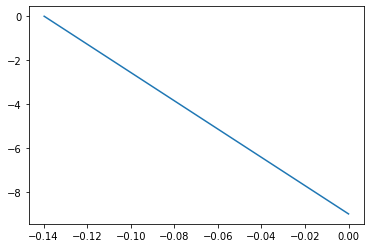

In [0]:
import matplotlib.pyplot as plt

# Print the coefficients and intercept for linear SVC
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

# plot the SVM graph
x = [-coefficients[1]/coefficients[0], 0]
y = [0, -coefficients[2]/coefficients[0]]
plt.plot(x, y)
plt.show()